In [1]:
# https://stackoverflow.com/questions/43646550/how-to-use-an-update-function-to-animate-a-networkx-graph-in-matplotlib-2-0-0
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn.apionly as sns
import matplotlib.animation
# from matplotlib.patches import Patch
from matplotlib.lines import Line2D

import random as rd

/Users/samstone/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


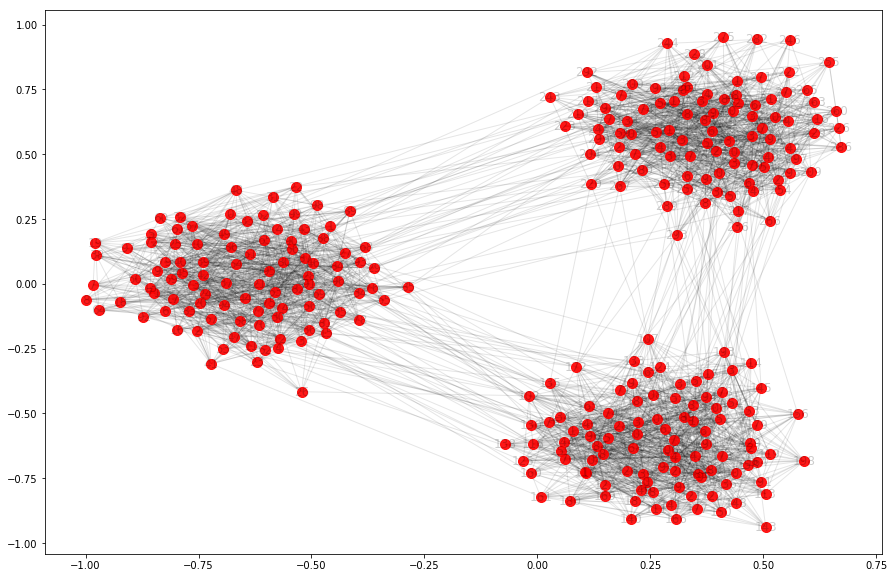

In [2]:
'''
sizes (list of ints) – Sizes of groups
p_in (float) – probability of edges with in groups
p_out (float) – probability of edges between groups
directed (boolean optional, default=False) – Whether to create a directed graph
seed (int optional, default None) – A seed for the random number generator
'''

SEED = 42

PERSONS_PER_CITY = 100
CITY_N = 3
POPULATION_SIZE = PERSONS_PER_CITY * CITY_N

PROB_EDGE_IN_CITY = 0.2
PROB_EDGE_OUT_CITY = 0.005

NODE_SIZE = 100
NODE_ALPHA = 0.9
EDGE_ALPHA = 0.1
LABEL_ALPHA = 0.2

COLOR_SUSCEPTIBLE = 'lightgrey'
COLOR_INFECTED_NOT_DIAGNOSED = 'red'
COLOR_INFECTED_DIAGNOSED = 'blue'
COLOR_RECOVERED = 'lightgreen'
COLOR_DIED = 'black'

POTENTIAL_CITIES = [
    'New York',
    'San Francisco',
    'Los Angeles',
    'Houston',
    'Dallas',
    'Chicago',
    'Seattle',
    'Miami',
    'Washington DC',
    'Boston',
    'Philadelphia'
]

rd.seed(SEED)

_list2d = [[POTENTIAL_CITIES[c]] * PERSONS_PER_CITY for c in list(range(0, CITY_N))]
CITY_LIST = [item for sublist in _list2d for item in sublist]

DAYS_INFECTION_TO_DIAGNOSIS = 3
DAYS_DIAGNOSIS_TO_RECOVERY = 4
DAYS_DIAGNOSIS_TO_DEATH = 2

# Only those whose uniformly distributed (0, 1) latent infection severity 
# percentile is above the threshold will die when infected
INFECTION_SEVERITY_FATALITY_PERCENTILE = 0.90

PROB_INFECTION_BETWEEN_NEIGHBORS = 0.25

TRAVEL_PROB = 0.02


G = nx.random_partition_graph(
    CITY_N * [PERSONS_PER_CITY], 
    PROB_EDGE_IN_CITY, 
    PROB_EDGE_OUT_CITY, 
    seed=SEED
)

pos=nx.spring_layout(G, seed=SEED)
fig, ax = plt.subplots(figsize=(15,10))

nx.draw_networkx_nodes(G, 
        node_color='red',
        node_size = NODE_SIZE,
        alpha=NODE_ALPHA,
        pos=pos, 
        ax=ax
)

nx.draw_networkx_edges(G, color='grey', alpha = EDGE_ALPHA, pos=pos, ax=ax);
nx.draw_networkx_labels(G, pos=pos, alpha=LABEL_ALPHA, ax=ax);

In [3]:
# print all columns

# TOO LARGE WHEN PERSONS > 100

# pd.set_option('display.max_columns', None)

# df = nx.to_pandas_adjacency(G, dtype=int)
# df.style.apply(
#     lambda x: ["background: red" if v > 0 else "" for v in x], axis = 1
# )

In [11]:
def plot_network(G, Persons, date, ax):
    pos=nx.spring_layout(G, seed=SEED)

    nx.draw_networkx_nodes(G, 
            nodelist=[p.node for p in Persons if p.health[date] == 'susceptible'],
            node_color=COLOR_SUSCEPTIBLE,
            node_size=NODE_SIZE,
            alpha=NODE_ALPHA,
            pos=pos, 
            ax=ax,
    )
    
    nx.draw_networkx_nodes(G, 
            nodelist=[p.node for p in Persons if p.health[date] == 'infected_not_diagnosed'],
            node_color=COLOR_INFECTED_NOT_DIAGNOSED,
            node_size=NODE_SIZE,
            alpha=NODE_ALPHA,
            pos=pos, 
            ax=ax,
    )
    
    nx.draw_networkx_nodes(G, 
            nodelist=[p.node for p in Persons if p.health[date] == 'infected_diagnosed'],
            node_color=COLOR_INFECTED_DIAGNOSED,
            node_size=NODE_SIZE,
            alpha=NODE_ALPHA,
            pos=pos, 
            ax=ax,
    )
    
    nx.draw_networkx_nodes(G, 
            nodelist=[p.node for p in Persons if p.health[date] == 'recovered'],
            node_color=COLOR_RECOVERED,
            node_size=NODE_SIZE,
            alpha=NODE_ALPHA,
            pos=pos, 
            ax=ax,
    )
    
    nx.draw_networkx_nodes(G, 
            nodelist=[p.node for p in Persons if p.health[date] == 'died'],
            node_color=COLOR_DIED,
            node_size=NODE_SIZE,
            alpha=NODE_ALPHA,
            pos=pos, 
            ax=ax,
    )

    nx.draw_networkx_edges(G, edge_color='lightgrey', alpha=EDGE_ALPHA, pos=pos, ax=ax);
    nx.draw_networkx_labels(G, pos=pos, alpha=LABEL_ALPHA, ax=ax);
    ax.set_title('Day {}'.format(date))
    

    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='susceptible', 
               markerfacecolor=COLOR_SUSCEPTIBLE, markersize=15),
        Line2D([0], [0], marker='o', color='w', label='infected_not_diagnosed', 
               markerfacecolor=COLOR_INFECTED_NOT_DIAGNOSED, markersize=15),
        Line2D([0], [0], marker='o', color='w', label='infected_diagnosed', 
               markerfacecolor=COLOR_INFECTED_DIAGNOSED, markersize=15),
        Line2D([0], [0], marker='o', color='w', label='recovered', 
               markerfacecolor=COLOR_RECOVERED, markersize=15),
        Line2D([0], [0], marker='o', color='w', label='died', 
               markerfacecolor=COLOR_DIED, markersize=15),
    ]

    ax.legend(handles=legend_elements, loc='upper left')
    
    
def plot_stats(df, date, days, ax):
    df.loc[:date][[
        'observed_infection_rate',
        'population_susceptibility_rate',
        'population_infection_rate',
        'population_immunity_rate',
        'population_mortality_rate',
        'fatality_rate',
    ]].plot(
        kind='line', 
        colors=[
            'blue',
            'orange',
            'green',
            'red',
            'purple',
            'brown',
        ], 
        grid=True,
        ax=ax, xlim=(0, days), ylim=(-0.05, 1.05))
    
    legend_elements = [
        Line2D([0], [0], color='blue', lw=4, label='observed_infection_rate'),
        Line2D([0], [0], color='orange', lw=4, label='population_susceptibility_rate'),
        Line2D([0], [0], color='green', lw=4, label='population_infection_rate'),
        Line2D([0], [0], color='red', lw=4, label='population_immunity_rate'),
        Line2D([0], [0], color='purple', lw=4, label='population_mortality_rate'),
        Line2D([0], [0], color='brown', lw=4, label='fatality_rate'),
    ]

    ax.legend(handles=legend_elements, loc='upper left')
    ax.set_xlabel('Day')

In [29]:
class Person():
    
    def __init__(self, G, node):
        
        # these attributes are immutable over time
        self.node = node
        
        self.infection_severity_percentile = rd.uniform(0, 1)
        self.travel_prob = TRAVEL_PROB
        self.neighbors = list(G.neighbors(node))
        
        # these attributes are mutable over time, only 1 value stores
        self.date = 0
        self.infected_date = None
        
        # these attributes are mutable over time; all values stored
        self.health = ['susceptible']
        self.is_practicing_social_distancing = [False]
        self.city = [CITY_LIST[node]]
        
        
    def advance(self, Persons, toggle_social_distancing, mass_social_distancing_start_date):

        # advance city
        cities_with_neighbors = set([p.city[self.date] for p in Persons if p.node in self.neighbors])
        eligible_cities = list(cities_with_neighbors - set(self.city[self.date]))
        
        travel_score = rd.uniform(0, 1)
        
        if len(eligible_cities) > 0 and travel_score < TRAVEL_PROB:    
            self.city.append(rd.choice(eligible_cities))
        else:
            self.city.append(self.city[self.date])
        
        # advance health state
        if self.health[self.date] == 'susceptible':
            
            for n in self.neighbors:
                
                # Transmission only occurs between persons in the same city    
                if (
                    Persons[n].health[self.date] in ['infected_not_diagnosed', 'infected_diagnosed'] and
                    Persons[n].city[self.date] == self.city[self.date] and
                    not Persons[n].is_practicing_social_distancing[self.date]
                ):
                  
                    # roll the dice to see if transmittion occurs:
                    transmission_score = rd.uniform(0, 1)
                    
                    if transmission_score < PROB_INFECTION_BETWEEN_NEIGHBORS:
                        self.health.append('infected_not_diagnosed')
                        self.infected_date = self.date + 1
                        # since a person can only be infected once, break the loop,
                        # even if there are other neighbords who could also infect the person
                        break
                    
            # if no neighbor infects the person, then append 'susceptible'
            if len(self.health) == self.date + 1:
                self.health.append('susceptible')
                    
                    
        elif self.health[self.date] == 'infected_not_diagnosed':
            if self.date + 1 >= self.infected_date + DAYS_INFECTION_TO_DIAGNOSIS:
                self.health.append('infected_diagnosed')
            else:
                self.health.append('infected_not_diagnosed')
            
            
        elif self.health[self.date] == 'infected_diagnosed' and self.infection_severity_percentile > INFECTION_SEVERITY_FATALITY_PERCENTILE:
            if self.date + 1 >= self.infected_date + DAYS_INFECTION_TO_DIAGNOSIS + DAYS_DIAGNOSIS_TO_DEATH:
                self.health.append('died')
            else:
                self.health.append('infected_diagnosed') 
                
                
        elif self.health[self.date] == 'infected_diagnosed' and self.infection_severity_percentile <= INFECTION_SEVERITY_FATALITY_PERCENTILE:
            if self.date + 1 >= self.infected_date + DAYS_INFECTION_TO_DIAGNOSIS + DAYS_DIAGNOSIS_TO_RECOVERY:
                self.health.append('recovered')
            else:
                self.health.append('infected_diagnosed') 
             
            
        elif self.health[self.date] == 'recovered':
            self.health.append('recovered')
            
        elif self.health[self.date] == 'died':
            self.health.append('died')
            
        else:
            raise ValueError('Health status of node {} at date {}: {}'.format(
                self.node, self.date, self.health[self.date]
            ))
            
        # decide if candidate is practicing social_distancing
        if not toggle_social_distancing:
            self.is_practicing_social_distancing.append(False)
        elif self.date >= mass_social_distancing_start_date - 1:
            self.is_practicing_social_distancing.append(True)
        else:
            self.is_practicing_social_distancing.append(False)
            
        self.date += 1
   
'''
Implement this class and run simulation
'''

def run_simulation(G, days=25, toggle_social_distancing=False, mass_social_distancing_start_date=5):
    Persons = []

    for node in nx.nodes(G):
        Persons.append(Person(G, node))

    # Seed patient zero
    rd.seed(SEED)
    patient_zero = rd.choice(Persons)
    patient_zero.health = ['infected_not_diagnosed']
    patient_zero.infected_date = 0

    # Advance through time
    for i in range(days):
        for p in Persons:
            p.advance(Persons, toggle_social_distancing, mass_social_distancing_start_date)

    # Calculate summary stats        
    df = pd.DataFrame()

    for dt in range(days):
        df = df.append(
            dict(pd.Series([p.health[dt] for p in Persons]).value_counts()),
        ignore_index=True)

    df = df.fillna(0)

    df['observed_infection_rate'] = df['infected_diagnosed'] / POPULATION_SIZE

    # fatality is rate of deaths/infections, mortality is deaths/population
    df['population_susceptibility_rate'] = df['susceptible'] / POPULATION_SIZE

    # True infection rate
    df['population_infection_rate'] = (df['infected_diagnosed'] + df['infected_not_diagnosed']) / POPULATION_SIZE
    df['population_immunity_rate'] = df['recovered'] / POPULATION_SIZE

    try:
        df['population_mortality_rate'] = df['died'] / POPULATION_SIZE
        df['fatality_rate'] = df['died'] / (df['died'] + df['recovered'])
    except:
        df['population_mortality_rate'] = np.nan
        df['fatality_rate'] = np.nan

    # plot summary stats
    fig, ax = plt.subplots(figsize=(20,10))
    plot_stats(df, days, days, ax)
    
    return Persons

/Users/samstone/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


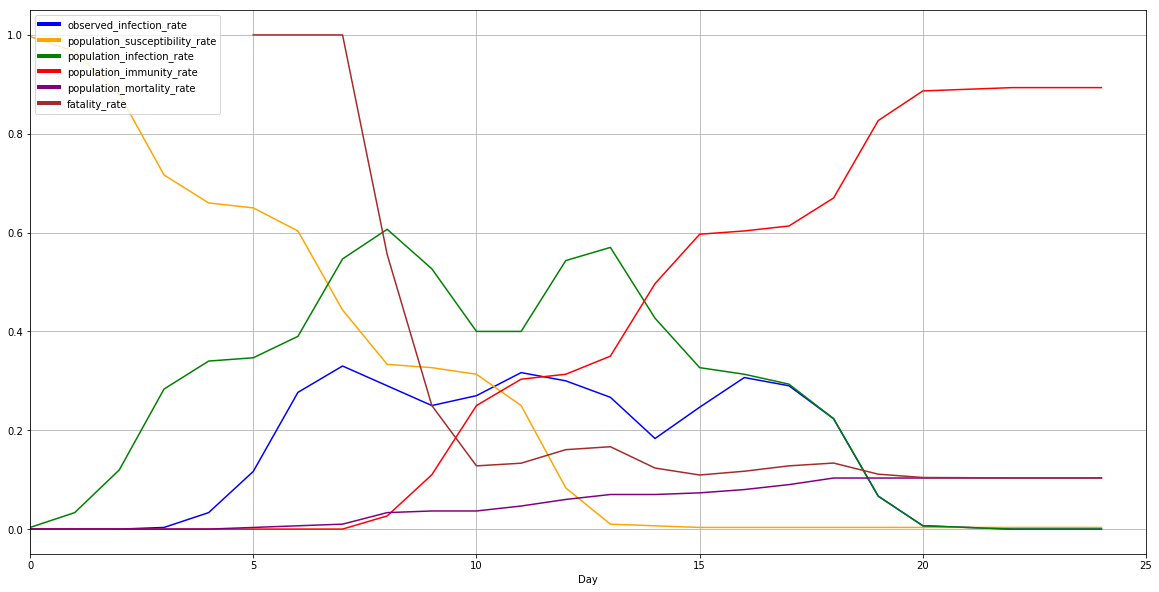

In [36]:
persons_no_sd = run_simulation(G, days=25, toggle_social_distancing=False)

/Users/samstone/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


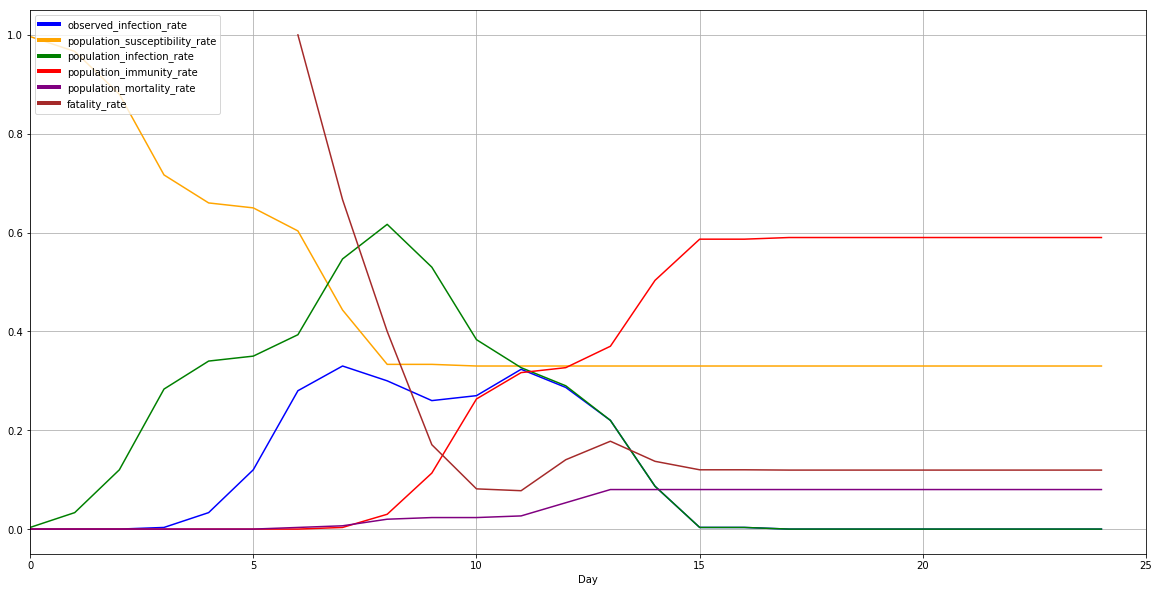

In [31]:
persons = run_simulation(G, days=25, toggle_social_distancing=True, mass_social_distancing_start_date=10)

/Users/samstone/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


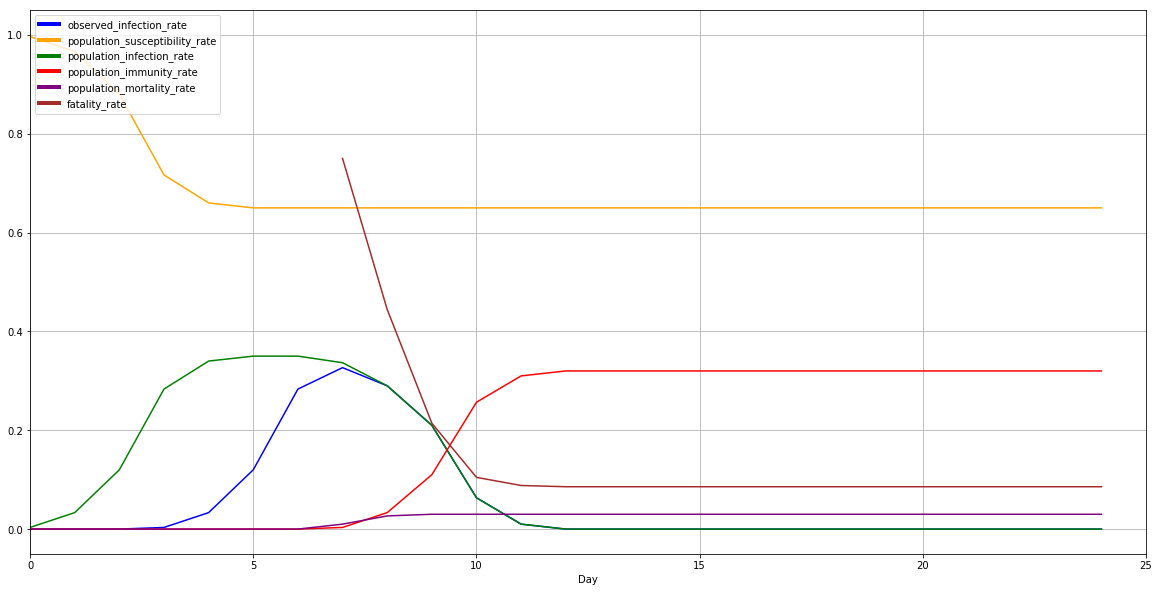

In [33]:
persons = run_simulation(G, days=25, toggle_social_distancing=True, mass_social_distancing_start_date=5)

In [34]:
# pos=nx.spring_layout(G, seed=SEED)
# fig, ax = plt.subplots(figsize=(10,10))

# plot_network(G, Persons, 0, ax)

/Users/samstone/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/Users/samstone/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/Users/samstone/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/Users/samstone/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/Users/samstone/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/Users/samstone/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarnin

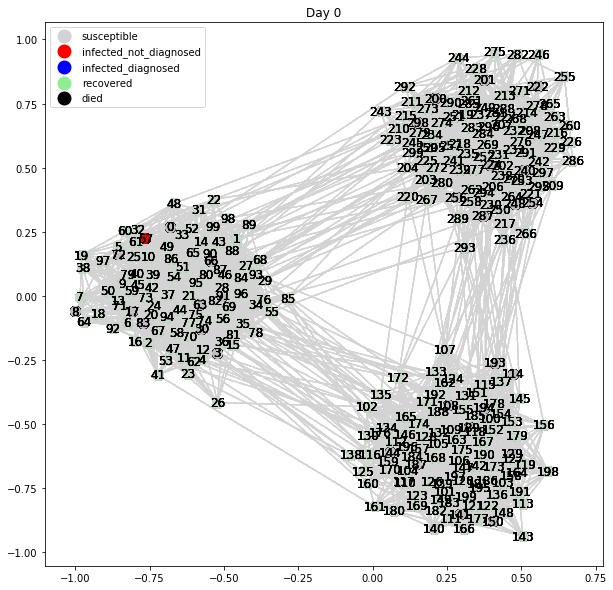

In [39]:
def update_network(ctr):
    print(ctr)
    plot_network(G, persons_no_sd, ctr, ax)

pos=nx.spring_layout(G, seed=SEED)
fig, ax = plt.subplots(figsize=(10,10))

network_ani = matplotlib.animation.FuncAnimation(fig, update_network, frames=len(persons_no_sd[0].city), interval=100, repeat=False)
network_ani.save('network_no_sd.gif', writer='imagemagick', fps=1)

In [ ]:
def update_stats(ctr):
    plot_stats(Persons, ctr, ax)

fig, ax = plt.subplots(figsize=(10,10))

stats_ani = matplotlib.animation.FuncAnimation(fig, update_stats, frames=DAYS, interval=100, repeat=False)
stats_ani.save('stats_sd_{}.gif'.format(TOGGLE_SOCIAL_DISTANCING), writer='imagemagick', fps=1)